In [1]:
import pandas as pd
import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import signal
import openpyxl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults


In [2]:
PV = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/seobu_pv.csv'
pv_source = pd.read_csv(PV, encoding='CP949')
pv_source = pd.DataFrame(pv_source)
pv_source = pv_source.iloc[0:1277, :]
pv_data = np.array(pv_source)

weather_17 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/mokpo_2017.csv'
weather_18 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/mokpo_2018.csv'
weather_19 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/mokpo_2019.csv'
weather_20 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/mokpo_2020.csv'

weather_17 = pd.read_csv(weather_17, encoding='CP949')
weather_18 = pd.read_csv(weather_18, encoding='CP949')
weather_19 = pd.read_csv(weather_19, encoding='CP949')
weather_20 = pd.read_csv(weather_20, encoding='CP949')
weather = pd.concat([weather_17,weather_18,weather_19,weather_20])
weather_data = np.array(weather)

pv_data = np.nan_to_num(pv_data)
weather_data = np.nan_to_num(weather_data)
pv_dat = pv_data[:, 2:]
weather_dat = weather_data[:, 3:]
pv_dat = pv_dat.reshape(-1,1)

dataset = np.hstack([pv_dat, weather_dat])
index = ['Measured PV', 'Temperature C', 'Rainfall', 'Wind speed', 'Wind direction', 'Humidity', 'Air pressure', 'Dew point C', 'Sunshine', 'Solar radiation', 'Snowfall', 'Cloud cover', 'Surface temp C']

df = pd.DataFrame(dataset, columns=index)
df.head()
df = df.fillna(0)

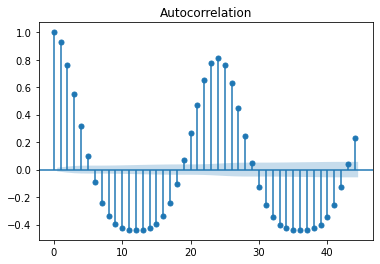

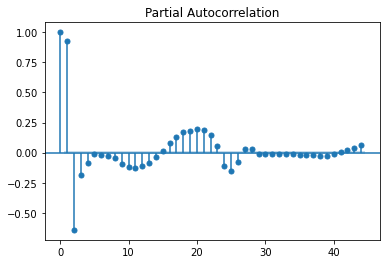

In [3]:
df = np.array(df)
pv = df[:,0]
pv = pv.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
pv = scaler.fit_transform(pv)
pv = pv.reshape(-1)
pv = pd.Series(pv)
X = pv.values
Training_set = X[0:21447]
Test_set = X[21448:]
history = [x for x in Training_set]
predictions = list()

plot_acf(Training_set)
plot_pacf(Training_set)
plt.show()

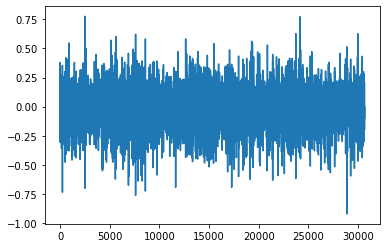

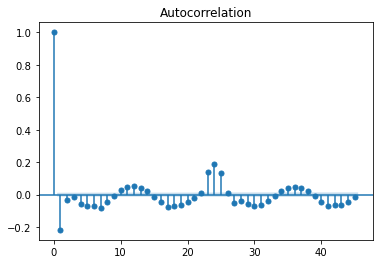

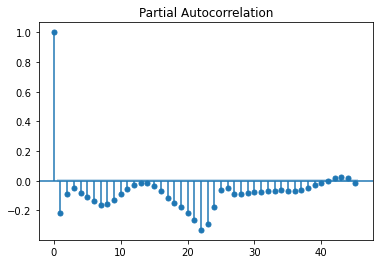

In [4]:
diff_1 = pv.diff(periods=1).iloc[1:]
#diff_1.plot()
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
plot_pacf(diff_2)
plt.show()

In [5]:
for t in range(len(Test_set)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(Test_set[t])

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likeli

In [12]:
def mae(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_true- y_pred))) 

(9200, 1)
Test RMSE: 0.367
Test MAE: 0.248


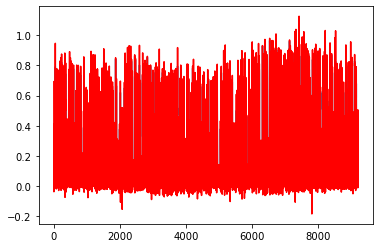

In [13]:
predictions = np.array(predictions)
print(predictions.shape)
rmse_result = root_mean_squared_error(Test_set, predictions)
mae_result = mae(Test_set, predictions)


print('Test RMSE: %.3f' % rmse_result)
print('Test MAE: %.3f' % mae_result)


plt.plot(Test_set)
plt.plot(predictions, color='red')
plt.show()
np.savetxt('ARIMA_PREDICTION.txt', predictions)
